In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('loan prediction.csv')

# Display the first few rows of the dataset
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Check for missing values in the dataset
missingvalues = df.isnull().sum()

missingvalues


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
# Check for duplicate rows
duplicate = data.duplicated().sum()

duplicate


0

In [4]:
# Impute missing values

# For categorical columns, impute with mode
data = df.copy
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in categorical_cols:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)

# For LoanAmount, impute with median
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

# Check if all missing values have been addressed
missing_after_imputation = data.isnull().sum()

missing_after_imputation


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


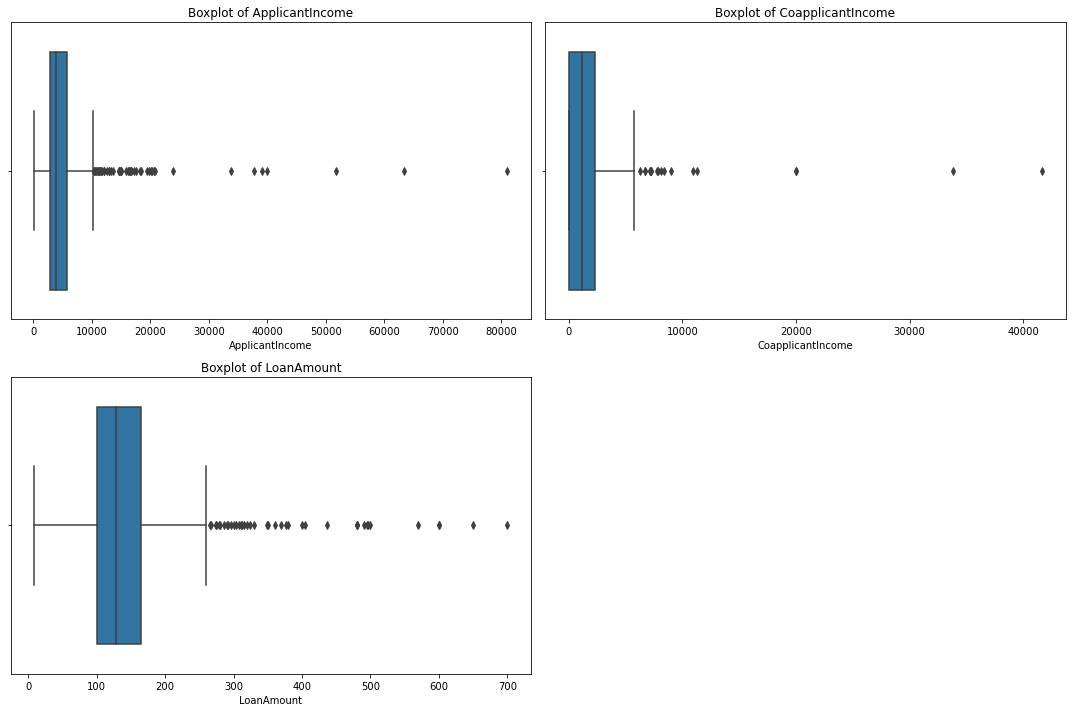

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Boxplot for ApplicantIncome
plt.subplot(2, 2, 1)
sns.boxplot(data['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome')

# Boxplot for CoapplicantIncome
plt.subplot(2, 2, 2)
sns.boxplot(data['CoapplicantIncome'])
plt.title('Boxplot of CoapplicantIncome')

# Boxplot for LoanAmount
plt.subplot(2, 2, 3)
sns.boxplot(data['LoanAmount'])
plt.title('Boxplot of LoanAmount')

# Display the plots
plt.tight_layout()
plt.show()


In [6]:
def outlierdetection(column):
    """
    Calculate the percentage of outliers in a given column using the IQR method.
    """
    # Calculate Q1 and Q3
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    # Compute the IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outlier_count = ((column < lower_bound) | (column > upper_bound)).sum()
    
    # Calculate the percentage of outliers
    outlier_percentage = (outlier_count / len(column)) * 100
    
    return outlier_percentage

# Compute the percentage of outliers for each column
outlier_percentages = {
    'ApplicantIncome': outlierdetection(data['ApplicantIncome']),
    'CoapplicantIncome': outlierdetection(data['CoapplicantIncome']),
    'LoanAmount': outlierdetection(data['LoanAmount'])
}

outlier_percentages


{'ApplicantIncome': 8.143322475570033,
 'CoapplicantIncome': 2.9315960912052117,
 'LoanAmount': 6.677524429967427}

In [7]:
def imputation(column):
    """
    Impute outliers in a given column using the IQR method.
    """
    # Calculate Q1 and Q3
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    # Compute the IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with Q1 and Q3 values
    column.loc[column < lower_bound] = Q1
    column.loc[column > upper_bound] = Q3
    
    return column

# Impute outliers for each column
data['ApplicantIncome'] = imputation(data['ApplicantIncome'])
data['CoapplicantIncome'] = imputation(data['CoapplicantIncome'])
data['LoanAmount'] = imputation(data['LoanAmount'])

# Verify the changes by checking the percentage of outliers again
outlier_percentages_after_imputation = {
    'ApplicantIncome': outlierdetection(data['ApplicantIncome']),
    'CoapplicantIncome': outlierdetection(data['CoapplicantIncome']),
    'LoanAmount': outlierdetection(data['LoanAmount'])
}

outlier_percentages_after_imputation


C:\Users\Hp\AppData\Local\Temp/ipykernel_36188/3148930872.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column < lower_bound] = Q1
C:\Users\Hp\AppData\Local\Temp/ipykernel_36188/3148930872.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column < lower_bound] = Q1
C:\Users\Hp\AppData\Local\Temp/ipykernel_36188/3148930872.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column > upper_boun

{'ApplicantIncome': 0.0, 'CoapplicantIncome': 0.0, 'LoanAmount': 0.0}

In [8]:
# Save the cleaned dataset to a new CSV file
file_path = "cleaned_loan_prediction.csv"
data.to_csv(file_path, index=False)

file_path


'cleaned_loan_prediction.csv'